### Information for each column of the DATA
* sl_no = Serial Number
* gender = Male : 'M', Female : 'F'
* ssc_p = Secondary Education percentage - 10th Grade
* ssc_b = Board of Education-Central/ Others
* hsc_p = Higher Secondary Education percentage- 12th Grade
* hsc_b = Board of Education-Central/ Others
* hsc_s = Specialization in Higher Secondary Education
* decree_p = Degree Percentage
* decree_t = Under Graduation ( Degree type) - Field of degree education
* workex = Work Experience
* etest_p = Employability test percentage ( conducted by college)
* specialisation = Post Graduation(MBA)- Specialization
* mba_p = MBA percentage
* status = Status of placement- Placed/Not placed
* salary = Salary offered by corporate to candidates

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Placement_Data_Full_Class.csv')

In [3]:
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [5]:
df.shape

(215, 15)

In [106]:
del df['sl_no']

In [107]:
df.describe()

,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


## We can clearly see that we have some missing values in the salary column.
 * We can tackle this problems in two ways
     * Deleting the missing values
     * Replacing those missing values with the mean of the column
### I'm going to choose the second path because a lot of the data is missing and I dont want to waste any more data. The dataset is quite small.

In [108]:
df_preprocessing  = df.copy()

In [109]:
df_preprocessing['salary'].fillna((df_preprocessing['salary'].mean()), inplace=True)

In [110]:
df_preprocessing.describe()

,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000
mean,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,10.827205,10.897509,7.358743,13.275956,5.833385,77457.900102
min,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,60.600000,60.900000,61.000000,60.000000,57.945000,250000.000000
50%,67.000000,65.000000,66.000000,71.000000,62.000000,288655.405405
75%,75.700000,73.000000,72.000000,83.500000,66.255000,288655.405405
max,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


## Distribution plots for each numerical variable

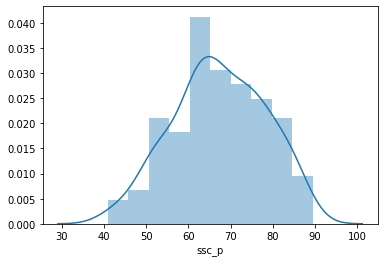

In [111]:
sns.distplot(df_preprocessing['ssc_p'])

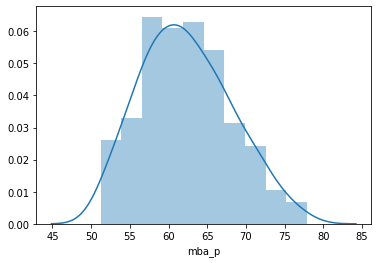

In [112]:
sns.distplot(df_preprocessing['mba_p'])

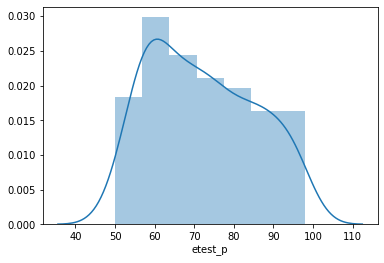

In [113]:
sns.distplot(df_preprocessing['etest_p'])

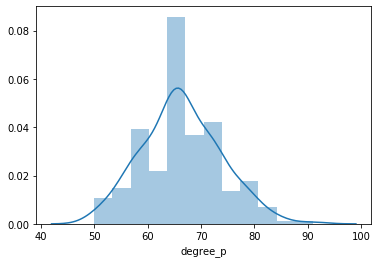

In [114]:
sns.distplot(df_preprocessing['degree_p'])

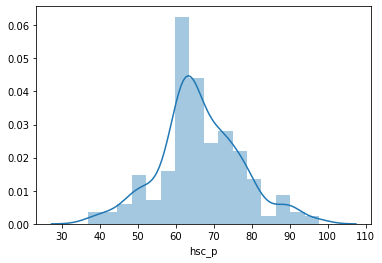

In [115]:
sns.distplot(df_preprocessing['hsc_p'])

### Getting rid of some possible outliers that we can clearly see in the graphs

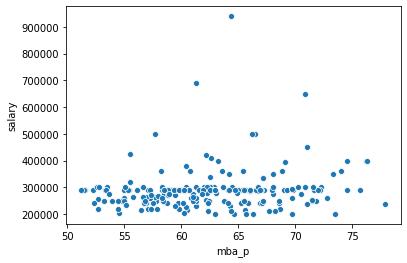

In [116]:
sns.scatterplot(df_preprocessing['mba_p'], df_preprocessing['salary'])

In [117]:
df_preprocessing[df_preprocessing['salary'] > 600000]

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
119,M,60.8,Central,68.40,Central,Commerce,64.6,Comm&Mgmt,Yes,82.66,Mkt&Fin,64.34,Placed,940000.0
150,M,71.0,Central,58.66,Central,Science,58.0,Sci&Tech,Yes,56.00,Mkt&Fin,61.30,Placed,690000.0
177,F,73.0,Central,97.00,Others,Commerce,79.0,Comm&Mgmt,Yes,89.00,Mkt&Fin,70.81,Placed,650000.0


In [118]:
df_preprocessing.drop([119, 150, 177], inplace=True)

In [119]:
df_preprocessing[df_preprocessing['salary'] > 600000]

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary


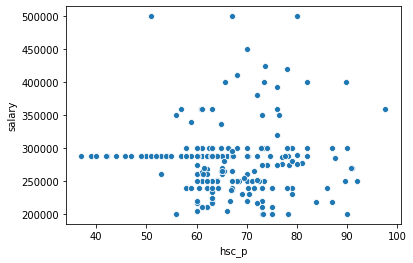

In [120]:
sns.scatterplot(df_preprocessing['hsc_p'], df_preprocessing['salary'])

In [121]:
df_preprocessing[(df_preprocessing['salary'] > 470000) & (df_preprocessing['hsc_p'] < 85)]

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
77,M,64.00,Others,80.00,Others,Science,65.00,Sci&Tech,Yes,69.0,Mkt&Fin,57.65,Placed,500000.0
163,M,63.00,Others,67.00,Others,Science,64.00,Sci&Tech,No,75.0,Mkt&Fin,66.46,Placed,500000.0
174,M,73.24,Others,50.83,Others,Science,64.27,Sci&Tech,Yes,64.0,Mkt&Fin,66.23,Placed,500000.0


In [122]:
df_preprocessing.drop([77, 163, 174], inplace=True)

In [123]:
df_preprocessing[(df_preprocessing['salary'] > 470000) & (df_preprocessing['hsc_p'] < 85)]

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary


### Now we can try to transform the categorical data, that we can only have numbers

In [141]:
df_dummies = pd.get_dummies(df_preprocessing, drop_first=True)

In [142]:
df_dummies.shape

(209, 16)

In [143]:
df_dummies.head()

,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary,gender_M,ssc_b_Others,hsc_b_Others,hsc_s_Commerce,hsc_s_Science,degree_t_Others,degree_t_Sci&Tech,workex_Yes,specialisation_Mkt&HR,status_Placed
0,67.00,91.00,58.00,55.0,58.80,270000.000000,1,1,1,1,0,0,1,0,1,1
1,79.33,78.33,77.48,86.5,66.28,200000.000000,1,0,1,0,1,0,1,1,0,1
2,65.00,68.00,64.00,75.0,57.80,250000.000000,1,0,0,0,0,0,0,0,0,1
3,56.00,52.00,52.00,66.0,59.43,288655.405405,1,0,0,0,1,0,1,0,1,0
4,85.80,73.60,73.30,96.8,55.50,425000.000000,1,0,0,1,0,0,0,0,0,1


# Start the model

In [173]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import explained_variance_score
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score

In [165]:
X = df_dummies.drop(['status_Placed'], axis=1)

In [166]:
y = df_dummies.status_Placed.values

In [167]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=.2)

In [168]:
dt_model = DecisionTreeClassifier()

In [169]:
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [170]:
pred = dt_model.predict(X_test)

In [175]:
accuracy_score(y_test, pred)

0.9761904761904762

In [184]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

rf = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, 
                               n_iter = 100, cv = 3, 
                               verbose=0, random_state=42, n_jobs = -1)

rf_random.fit(X_train, y_train)

y_pred = rf_random.predict(X_test)

In [185]:
rf_random.best_estimator_

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=70, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=1600,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [186]:
accuracy_score(y_test, y_pred)

1.0